"Wine Quality Predcition":
Attribute Information:
    
For more information, read [Cortez et al., 2009].

Input variables
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 3 and 8)

We will be prediciting wine quality by considering this as a classification problem. 

In [1]:
# Import basic libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Import Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data file using Pandas  
df=pd.read_csv('winequality_red.csv')

In [3]:
# Lets look top 10 rows of the wine dataset 
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
print(df.shape)

(1599, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
# using isnull() function for finding null values   
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
print(df.describe(include='all'))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [8]:
# Lets peint the unique values
print(df.nunique())

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


In [9]:
# Lets see wine quality count distribution for each class
c_count=df['quality'].value_counts()
print(c_count)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

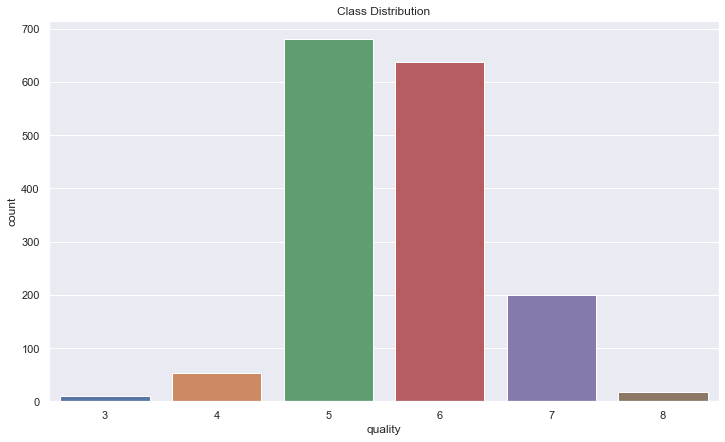

In [10]:
# Visual Representation of the dependent variable distribution in the dataset
sns.set(rc={'figure.figsize':(12,7)})
quality_c=df['quality']
df1_count=sns.countplot(x=quality_c, data=df)
plt.title("Class Distribution")

Above graph clearly shows we have high count of class 5 and 6 in quality column

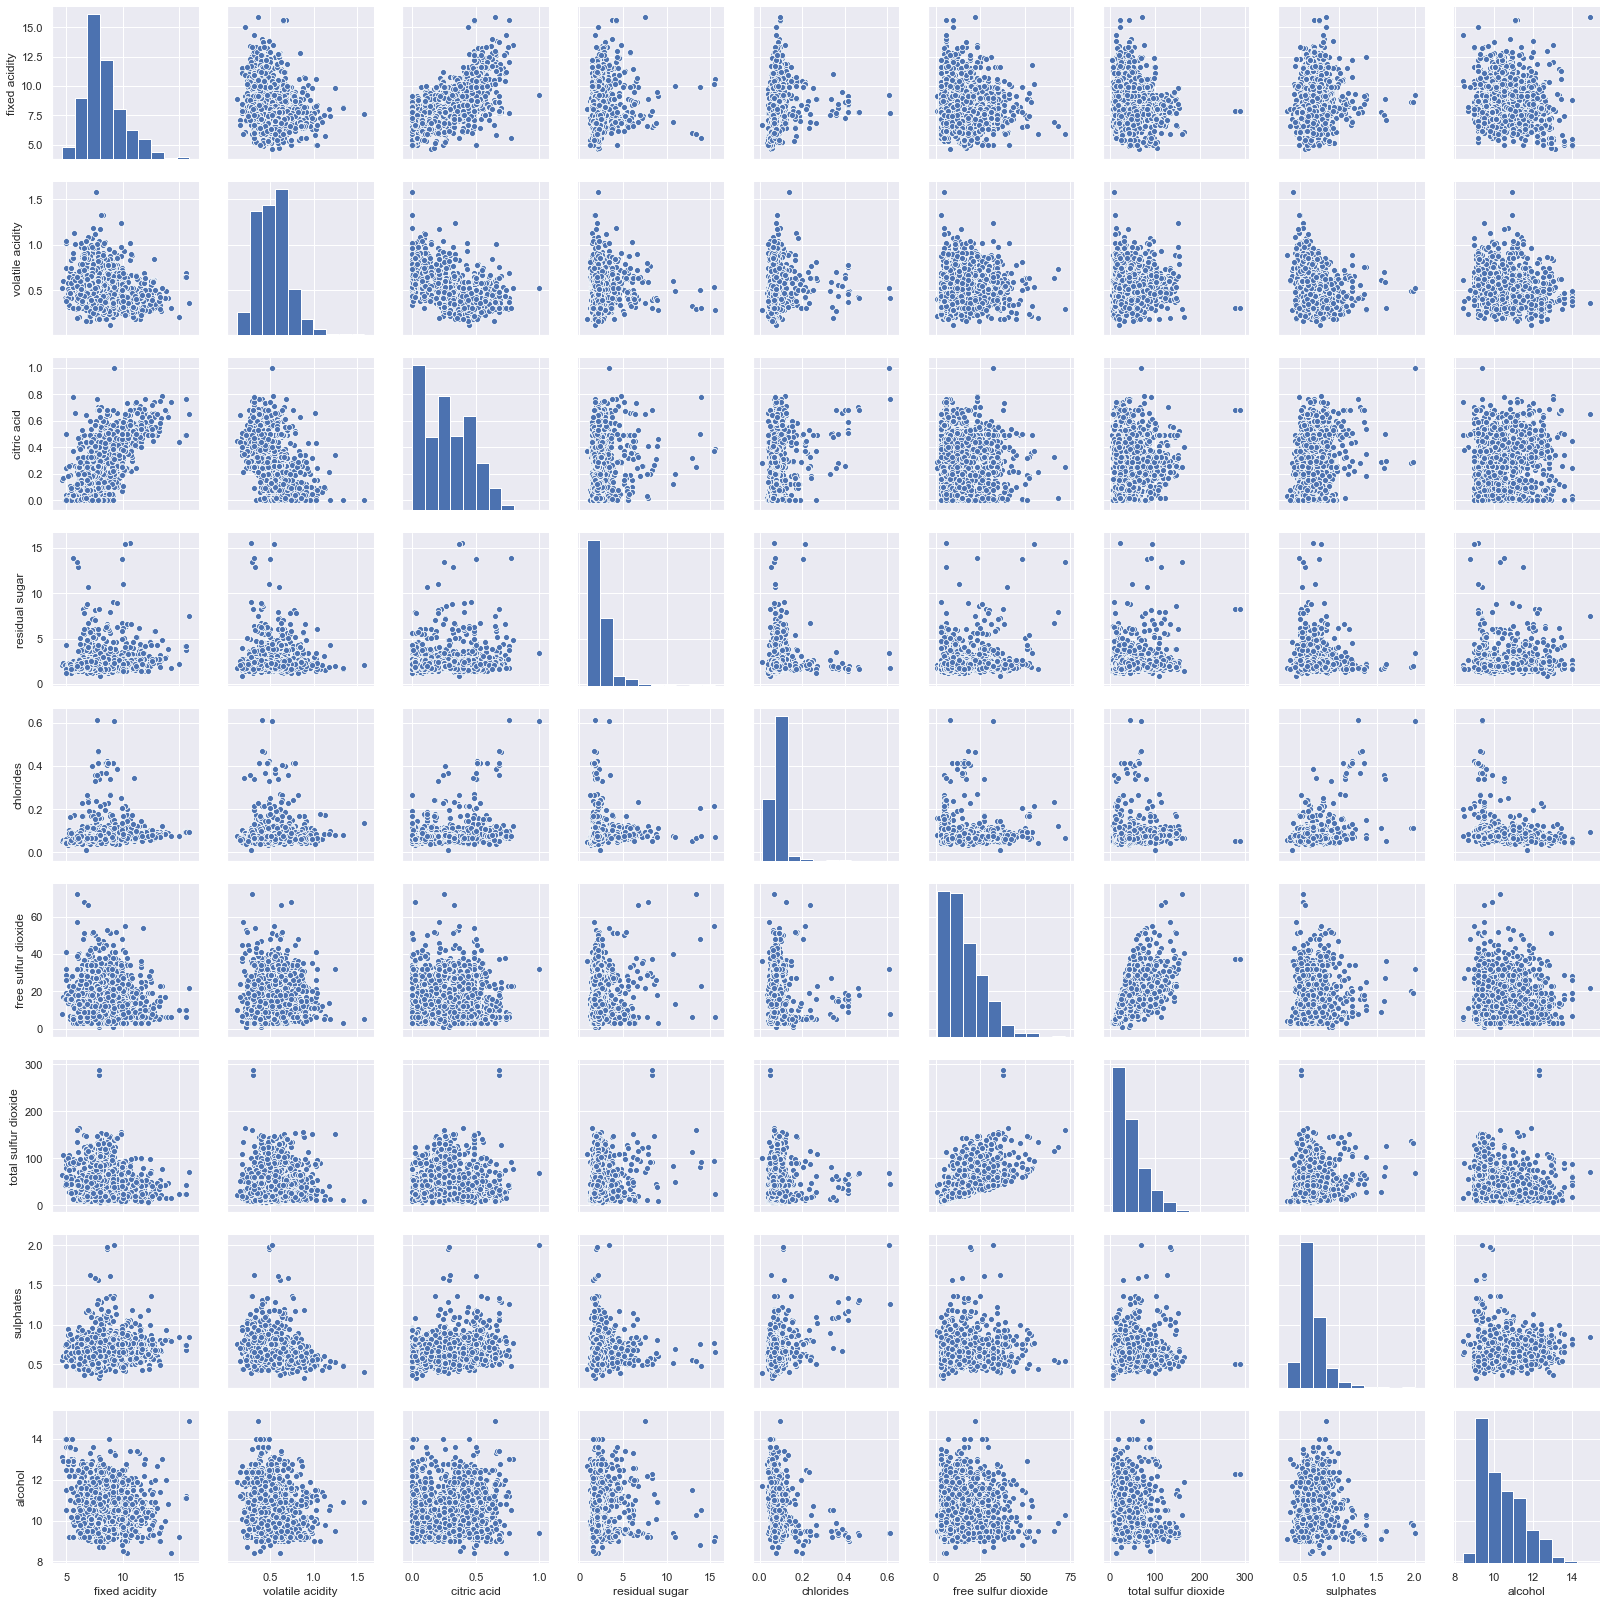

In [11]:
#The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot.
df_hist = df.drop(['pH', 'quality', 'density'], axis=1)
sns.pairplot(df_hist)

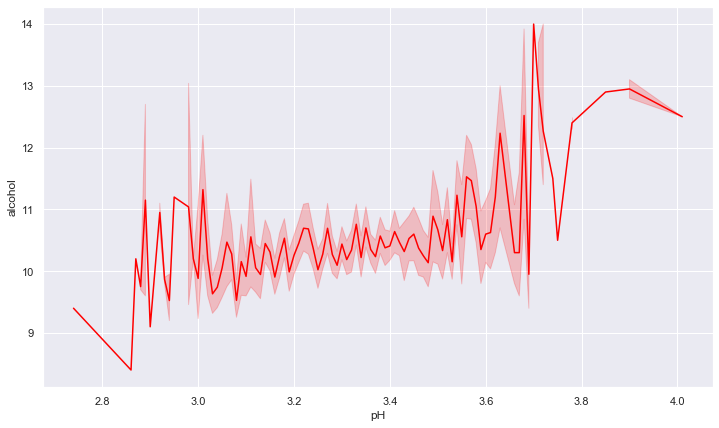

In [12]:
# Draw line plot between pH wrt alcohol content in wine. 
sns.lineplot(x = "pH", y = "alcohol", data=df, color='red')
plt.show()

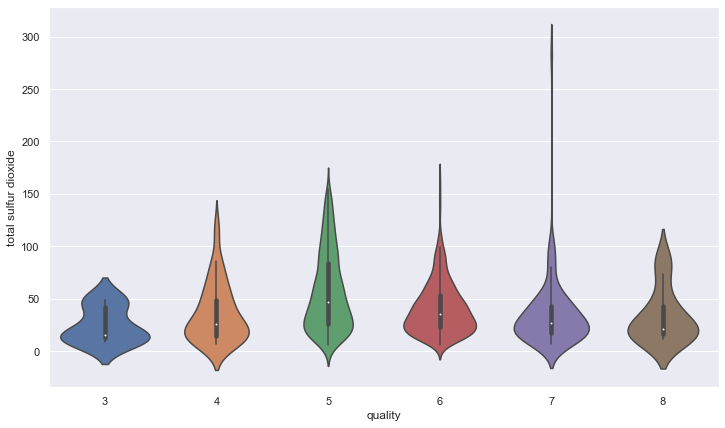

In [13]:
# Lets see total suphur dioxide in each quality class.
fig = plt.figure() 
sns.violinplot(data = df, x='quality', y='total sulfur dioxide' )

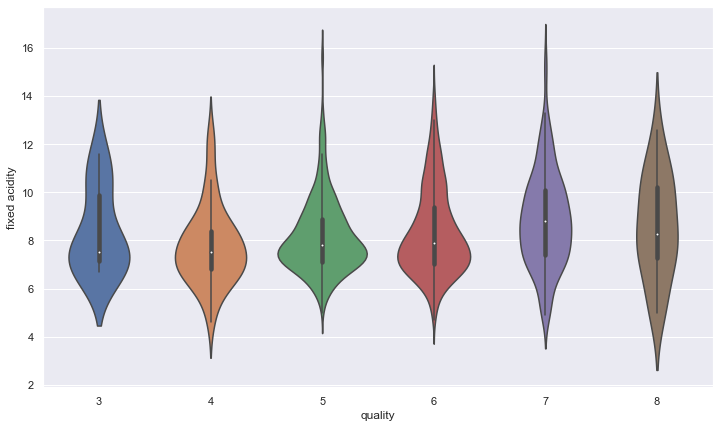

In [14]:
sns.violinplot(data = df, x='quality', y='fixed acidity' ) # Fixed acidity relatively low in wine quality class 5 and 6 

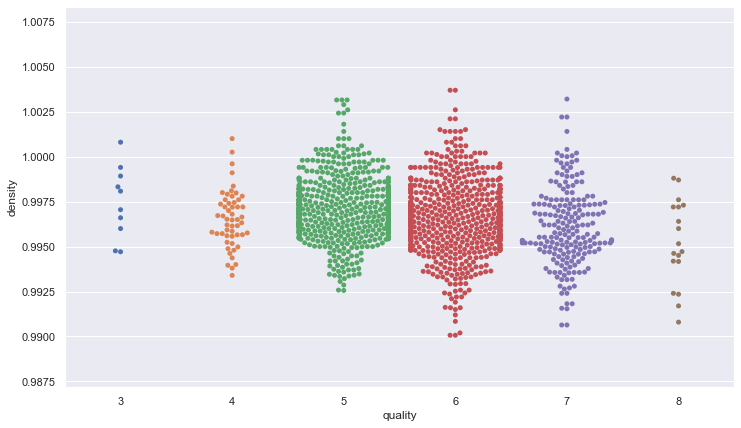

In [15]:
sns.swarmplot(data = df, x='quality', y='density') 

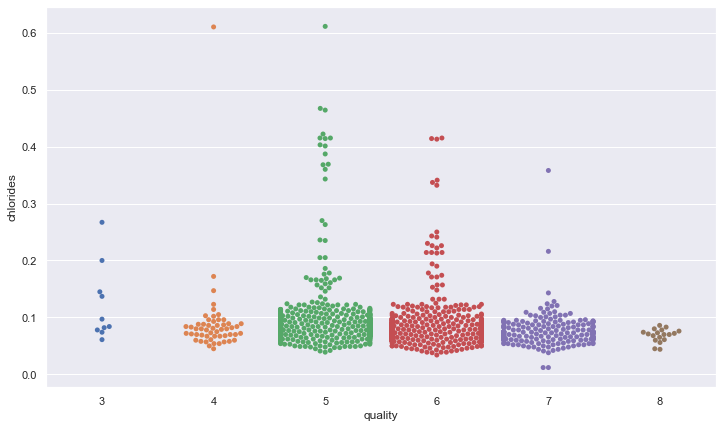

In [16]:
sns.swarmplot(data = df, x='quality', y='chlorides') # majority of the wine quality having chlorides less then 0.12.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

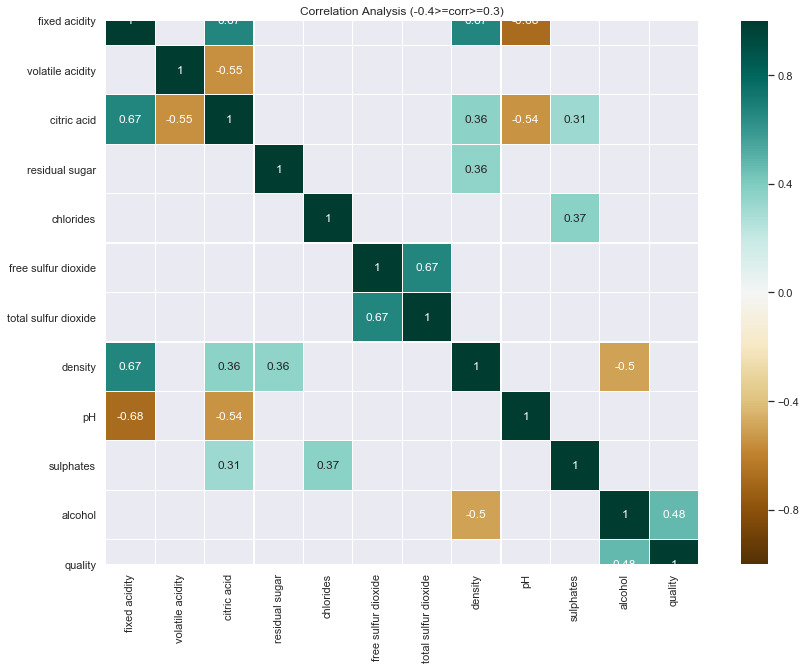

In [17]:
# Analysis the correlation in the wine dataset
corr = df.corr()
print(corr)

plt.figure(figsize=(15, 10))
plt.title('Correlation Analysis (-0.4>=corr>=0.3)')

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)], 
            cmap='BrBG', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)

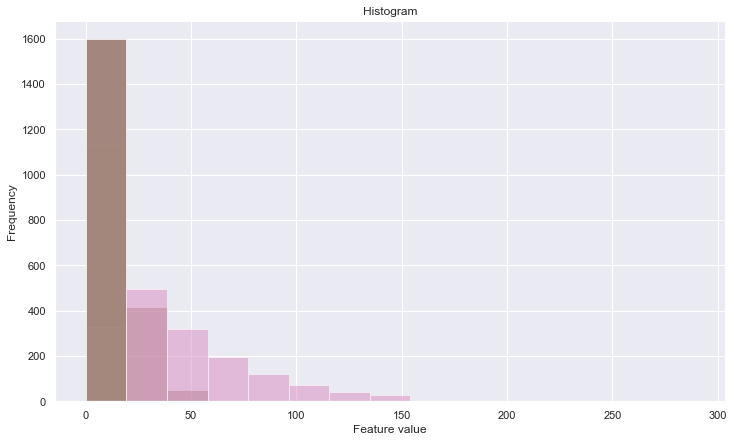

In [18]:
# Visualize the distribution of the data type in the feature space
df = pd.DataFrame(df)
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

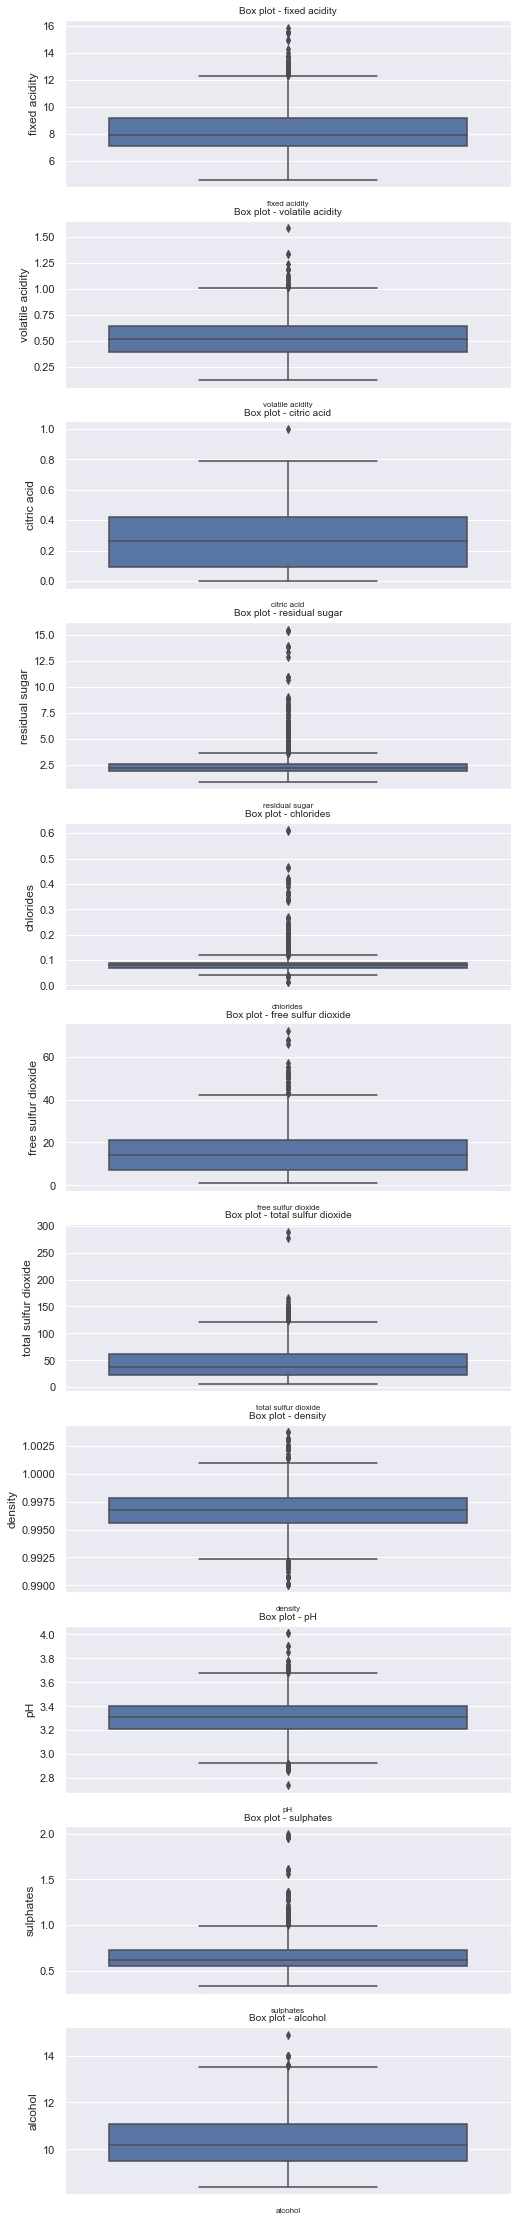

In [20]:
# Lets check outlier using Box plot for all columns except quality columns.
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Above box plots shows almost all columns consists outliers. Lets address the outliers in the features using Z-score. 

In [21]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [22]:
threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [23]:
df1 = df[(z < 3).all(axis=1)]
df1.shape

(1451, 12)

Lets define Wine quality into two classes make this binary classification problem. Human wine preferences scores varied from 3 to 8, so it’s straightforward to categorize answers into ‘bad’ or ‘good’ quality of wines.

In [24]:
#Define quality into three target classes 
def isQuality(quality):
    if quality > 6:
        return 1
    #if (quality >= 5) and (quality <= 6):
        #return 2
    else:
        return 0

In [25]:
df1['isQuality'] = df1['quality'].apply(isQuality)
print('New Classes are defined for the quality of wines:\n',df1['isQuality'].value_counts())

New Classes are defined for the quality of wines:
 0    1250
1     201
Name: isQuality, dtype: int64


In [26]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [27]:
# Seprate Data into features and target set
feature_data=df1.iloc[:,0:11]
target_class=df1['isQuality']
print(feature_data.shape)
print(target_class.shape)

(1451, 11)
(1451,)


In [28]:
# Lets use the standard Scaler to standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_data_std = sc.fit_transform(feature_data)
print(feature_data_std)

[[-0.55292997  1.05091371 -1.39039974 ...  1.37589608 -0.63645843
  -0.99985592]
 [-0.3099004   2.11933582 -1.39039974 ... -0.8219512   0.2883529
  -0.6081737 ]
 [-0.3099004   1.40705441 -1.18083057 ... -0.3965614   0.05715007
  -0.6081737 ]
 ...
 [-1.22126131 -0.07686519 -0.70929993 ...  0.73781138  0.82782618
   0.56687296]
 [-1.46429088  0.72445139 -0.76169222 ...  1.80128587  0.51955574
  -0.21649148]
 [-1.40353349 -1.26400088  1.07203802 ...  0.52511649  0.13421768
   0.56687296]]


In [29]:
# Reshape the target variable 
target_class=df1['isQuality'].values.reshape(-1,1)
print(target_class.shape)

(1451, 1)


In [30]:
#Lets train model and perform evaluations.
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Lets built "baseline model" using KNN

In [31]:
x_train, x_test, y_train, y_test = train_test_split(feature_data_std, target_class, random_state = 81,test_size=0.28)

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
# View the cross validation score of the Baseline model
scores = cross_val_score(knn_model, x_train, y_train, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.86784


In [34]:
y_pred = knn_model.predict(x_test)
print("Confusion Matrix: \n {}".format (confusion_matrix(y_test,y_pred)))

Confusion Matrix: 
 [[328  21]
 [ 26  32]]


In [35]:
print("Classification Report: \n {}".format (classification_report(y_test,y_pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       349
           1       0.60      0.55      0.58        58

    accuracy                           0.88       407
   macro avg       0.77      0.75      0.75       407
weighted avg       0.88      0.88      0.88       407



Lets perform parameter tunning to improve the results. 

Text(0, 0.5, 'Accuracy')

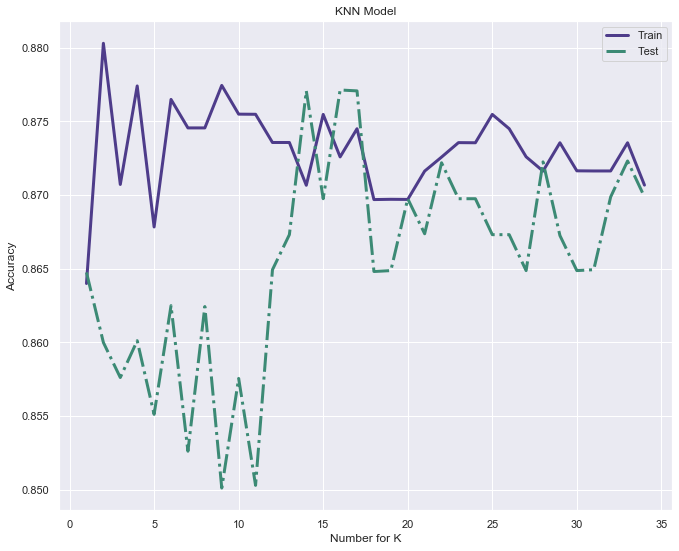

In [36]:
# Define paraameter range and score lists
nb_range = np.arange(1,35)
train_scr = []
test_scr = []

# Train a knn_model for every range value in the list
for k in nb_range :
    knn_model=KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    train_scr.append(cross_val_score(knn_model, x_train,y_train, cv=10, scoring='accuracy').mean())
    test_scr.append(cross_val_score(knn_model, x_test, y_test, cv=10, scoring='accuracy').mean())

# Plot the results
mpl.rcParams['figure.figsize'] = (11, 9)
plt.plot(nb_range,train_scr,label="Train",linewidth=3, color='#4e3c8a') 
plt.plot(nb_range,test_scr,label="Test", linewidth=3,linestyle='-.', color='#3c8a75')
plt.legend()
plt.title('KNN Model')
plt.xlabel('Number for K')
plt.ylabel('Accuracy')

In [37]:
# Fit the final knn model 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train);
scores = cross_val_score(knn_model, x_train,y_train, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.87072


KNN model didn't able to attain improved results even after parameter tunning. Results before and after tunning is almost similar. In order to acquire better results lets consider Ensemble methods for wine quality class predictions.

In [38]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import time
#The classification report visualizer displays the precision, recall, F1, and support scores for the model.
from yellowbrick.classifier import ClassificationReport

In [39]:
# fit Deafault models to find best among them. 
clfs = [XGBClassifier(),LGBMClassifier(), AdaBoostClassifier(), RandomForestClassifier()]

In [40]:
models = []
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [41]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=52)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

XGB 0.8850824175824176
LGBM 0.89753663003663
ADA 0.883186813186813
RF 0.9032509157509157


Random Forest provided better accuracy as compaed to the other baseline models used in this study. Lets find best parameters of random forest model using RandomizedSearchCV library 

In [42]:
# specify parameters and distributions
rf_classification = RandomForestClassifier()
param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)), random_state=list(range(42,242)), bootstrap=[True, False],
                  criterion = ["gini", "entropy"])
start_time = time.time()
rand_rf = RandomizedSearchCV(rf_classification, param_dist, cv=10)
rand_rf.fit(x_train, y_train)
training_time = time.time() - start_time
best_rf_classification = rand_rf.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for Random Forest: ",best_rf_classification)

Taining Time:  8.066318035125732
Best Parameters for Random Forest:  {'random_state': 137, 'n_estimators': 11, 'min_samples_leaf': 3, 'max_depth': 31, 'criterion': 'entropy', 'bootstrap': False}


In [43]:
rf_ = RandomForestClassifier(random_state=157, n_jobs=-1,
                            n_estimators=86, min_samples_leaf = 4, 
                            max_depth=42, criterion='entropy', bootstrap=False )
rf = rf_.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

*Test Accuracy: 91.4%


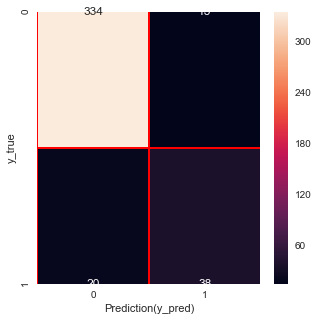

In [44]:
# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("y_true")
plt.show()

As we can clearly see that there is no major difference in results. Default model provided score 90.01 and tunned random forest providing 91.4%. Its worth trying hyper parameter optimizition however in our case we didn't observe significant improvement.
We can stick to default random forest model as well. 

In [45]:
# Create the submission file using random forest and submit!
preds = pd.DataFrame(y_pred, columns=['Wine_Quality_Pred'])
preds.to_csv('RandomForest_WineQuality.csv')

In [46]:
# Lastly Save the model for futher use
from sklearn.externals import joblib 
joblib.dump(rf_ , 'wine_quality.pkl')

['wine_quality.pkl']